In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('data/selected_projects_add.csv')

In [3]:
df_all.columns

Index(['Name', 'Is Fork', 'Commits', 'Branches', 'Default Branch', 'Releases',
       'Contributors', 'License', 'Watchers', 'Stargazers', 'Forks', 'Size',
       'Created At', 'Pushed At', 'Updated At', 'Homepage', 'Main Language',
       'Total Issues', 'Open Issues', 'Total Pull Requests',
       'Open Pull Requests', 'Last Commit', 'Last Commit SHA', 'Has Wiki',
       'Is Archived', 'Languages', 'Labels', 'checkstyle', 'findbugs', 'maven',
       'gradle', 'gradle_on_root', 'maven_usage_on_root', 'spotbugs',
       'android', 'commit_status'],
      dtype='object')

In [4]:
df_all.shape[0]

1454

In [5]:
df_all[df_all['checkstyle'] == 1].shape[0]

519

In [6]:
df_all[df_all['findbugs'] == 1].shape[0]

3

In [7]:
df_all[df_all['spotbugs'] == 1].shape[0]

104

In [78]:
df_all['ASATs_count'] = df_all['checkstyle'] + df_all['findbugs'] + df_all['spotbugs']

In [79]:
df_all['ASATs_count'].value_counts()

0    906
1    470
2     78
Name: ASATs_count, dtype: int64

In [8]:
df_all[(df_all['checkstyle'] == 1) | (df_all['findbugs'] == 1) | (df_all['spotbugs'] == 1)].shape[0]

548

In [9]:
using_sat = df_all[(df_all['checkstyle'] == 1) | (df_all['findbugs'] == 1) | (df_all['spotbugs'] == 1)].Name.tolist()

In [10]:
548/1454

0.3768913342503439

In [11]:
df_all[(df_all['checkstyle'] == 1) & (df_all['spotbugs'] == 1)].shape[0]

76

In [12]:
df_all[(df_all['checkstyle'] == 1) & (df_all['findbugs'] == 1)].shape[0]

2

In [13]:
df_all[(df_all['findbugs'] == 1) & (df_all['spotbugs'] == 1)].shape[0]

0

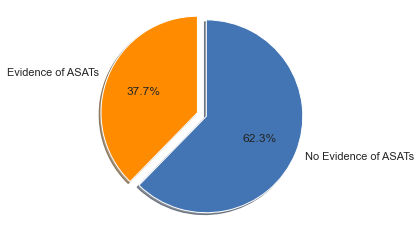

In [71]:
labels = 'Evidence of ASATs', 'No Evidence of ASATs'
colors = ["#FF8C00", "#4374B3"]
sizes = [548, (1454-548)]
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [15]:
df = pd.read_csv('data/local_build_results.csv')

In [16]:
df.head()

,repo_name,build_tool,last_commit_sha,success,fail,unclear,error
0,joinfaces/joinfaces,gradle,6b379a0240fa3002c4321abc919e0d62fcc4164f,0,0,0,1
1,apereo/cas,gradle,32a5e5de26fd70c1229efe7d66676228c663d1fc,0,0,0,1
2,remkop/picocli,gradle,bd48d6f3934c25876931dce5fcc3677dbfc1f410,0,0,0,1
3,shedaniel/roughlyenoughitems,gradle,303fe1b4564b0f7df38df59453e761e4a279dea5,0,0,1,0
4,hortonworks/cloudbreak,gradle,ef36a65f738b4ebc9bf5d932133621ea085808b8,0,0,1,0


In [73]:
df_all.spotbugs.value_counts()

0    1350
1     104
Name: spotbugs, dtype: int64

In [75]:
df_all.checkstyle.value_counts()

0    935
1    519
Name: checkstyle, dtype: int64

In [77]:
df_all.findbugs.value_counts()

0    1451
1       3
Name: findbugs, dtype: int64

In [17]:
build_success = df[df['success'] == 1].repo_name.tolist()
build_fail = df[df['success'] != 1].repo_name.tolist()

In [36]:
df_all.loc[df_all['Name'].isin(build_success), 'local_build_success'] = 1
df_all.loc[df_all['Name'].isin(build_success), 'local_build_failed'] = 0
df_all.loc[df_all['Name'].isin(build_fail), 'local_build_failed'] = 1
df_all.loc[df_all['Name'].isin(build_fail), 'local_build_success'] = 0
df_all.loc[df_all['Name'].isin(using_sat), 'ASAT_usage'] = 1
df_all.loc[~df_all['Name'].isin(using_sat), 'ASAT_usage'] = 0

In [37]:
df_grouped = df_all.groupby(by=['ASAT_usage', 'local_build_success', 'local_build_failed']).count().reset_index()
df_grouped.head()

,ASAT_usage,local_build_success,local_build_failed,Name,Is Fork,Commits,Branches,Default Branch,Releases,Contributors,...,checkstyle,findbugs,maven,gradle,gradle_on_root,maven_usage_on_root,spotbugs,android,commit_status,local_build
0,0.0,0.0,1.0,238,238,238,238,238,238,238,...,238,238,238,238,238,238,238,238,238,238
1,0.0,1.0,0.0,377,377,377,377,377,377,377,...,377,377,377,377,377,377,377,377,377,377
2,1.0,0.0,1.0,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
3,1.0,1.0,0.0,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282


In [50]:
print(377+238)
print(150+282)
print((377+238)/1047)
print((150+282)/1047)

615
432
0.5873925501432665
0.41260744985673353


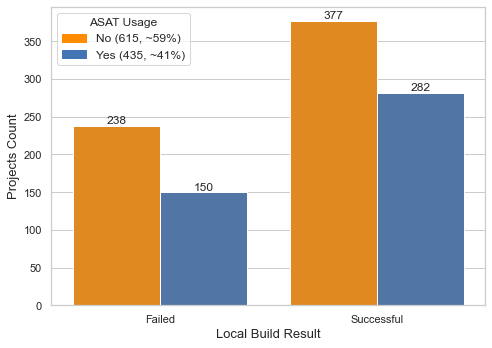

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
sns.set(rc={'figure.figsize':(6.5, 4)})
# Create an array with the colors you want to use
colors = ["#FF8C00", "#4374B3"]
# Set your custom color palette
sns.set(font_scale=1)
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x="local_build_success", y="Name", hue="ASAT_usage", data=df_grouped)
ax.set_xlabel("Local Build Result", fontsize = 13)
ax.set_ylabel("Projects Count", fontsize = 13)

orange_patch = mpatches.Patch(color=colors[0])
blue_patch = mpatches.Patch(color=colors[1])

ax.legend(title='ASAT Usage', labels=['No (615, ~59%)', 'Yes (435, ~41%)'], handles=[orange_patch, blue_patch], fontsize = 12)

plt.xticks([0,1], ['Failed', 'Successful'])
for container in ax.containers:
    ax.bar_label(container)
    
plt.gcf().set_size_inches(7,5)
plt.tight_layout()
plt.savefig('asat-bar-chart.pdf', dpi=300)


In [18]:
df_all[(df_all['Name'].isin(build_success)) & (df_all['Name'].isin(using_sat))].shape[0]

282

In [19]:
df_all[(df_all['Name'].isin(build_fail)) & (df_all['Name'].isin(using_sat))].shape[0]

150

In [20]:
df_all[(df_all['Name'].isin(build_success)) & (~df_all['Name'].isin(using_sat))].shape[0]

377

In [21]:
df_all[(df_all['Name'].isin(build_fail)) & (~df_all['Name'].isin(using_sat))].shape[0]

238

In [81]:
# Import libraries
import random
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.contingency_tables as ct
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [82]:
# Create contingency table 
OD = pd.DataFrame({'No ASAT': [238, 377],
                   'Yes ASAT' : [150, 282]},index ={'Build Failed','Successful Build'})
OD

,No ASAT,Yes ASAT
Build Failed,238,150
Successful Build,377,282


In [83]:
# chi-square test
chiRes = stats.chi2_contingency(OD)
# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 1.5543698357304931
p-value: 0.21249149245606067
degree of freedom: 1
expected contingency table
[[227.90830946 160.09169054]
 [387.09169054 271.90830946]]


In [84]:
# chi-square test
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
# chi-square test statistic (alternative method to derive chi-sq stat)
chisq_stat = stats.chi2_contingency(OD, correction=False)[0]
# sample size
n = np.sum(np.sum(OD))
# minimum of rows & columns
minshape = min(OD.shape)-1
# Cramer's v
V_ = np.sqrt( (chisq_stat/n)/minshape)
print(f"Cramer' V: {V_}")

chi-square statistic: 1.5543698357304931
p-value: 0.21249149245606067
Cramer' V: 0.04053896018642988


In [29]:
df_all

,Name,Is Fork,Commits,Branches,Default Branch,Releases,Contributors,License,Watchers,Stargazers,...,Labels,checkstyle,findbugs,maven,gradle,gradle_on_root,maven_usage_on_root,spotbugs,android,commit_status
0,1c-syntax/bsl-language-server,False,5114,25,develop,52,40,Other,19,192,...,"component/cli,component/codeAction,component/c...",0,0,0,1,1,0,0,0,pending
1,abhpd/hacktoberfest2021,False,266,7,main,0,77,MIT License,5,541,...,"bug,changes-needed,documentation,duplicate,enh...",0,0,0,0,0,0,0,0,pending
2,actiontech/dble,False,3352,53,master,43,27,GNU General Public License v2.0,76,860,...,"accidental_bug,Aggregate function,autotest-add...",1,0,1,0,0,1,0,0,pending
3,activiti/activiti,False,10768,33,develop,28,195,Apache License 2.0,647,8143,...,"api,api-events,automation,blocked,blocking,BPM...",1,0,1,0,0,1,0,0,pending
4,adeekshith/watomatic,False,1382,10,main,23,15,GNU General Public License v3.0,10,218,...,"bug,documentation,duplicate,enhancement,good f...",0,0,0,1,1,0,0,1,pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,zoinkwiz/quest-helper,False,1059,31,master,0,73,BSD 2-Clause Simplified License,8,101,...,"bug,discussion,documentation,duplicate,enhance...",0,0,0,1,1,0,0,0,pending
1450,zoranpandovski/design-patterns,False,962,2,master,0,176,NaN,14,271,...,"bug,duplicate,enhancement,good first issue,hac...",0,0,0,0,0,0,0,0,pending
1451,zsmartsystems/com.zsmartsystems.zigbee,False,1060,11,master,3,25,Eclipse Public License 1.0,19,102,...,"awaiting feedback,breaking change,bug,CC2531,C...",0,0,1,0,0,1,0,0,pending
1452,zstackio/zstack,False,11269,725,master,0,45,Other,136,1058,...,"bug,BUILD-FAIL,BUILD-PASS,dependencies,duplica...",0,0,1,0,0,1,0,0,pending


In [22]:
final_df = pd.read_csv('data/combined_results.csv')
final_df.head()

,repo_name,testing
0,1c-syntax/bsl-language-server,NaN
1,abhpd/hacktoberfest2021,NaN
2,actiontech/dble,Very Low
3,activiti/activiti,NaN
4,adeekshith/watomatic,NaN


In [25]:
final_df['sat_usage'] = df_all['checkstyle'] + df_all['findbugs'] + df_all['spotbugs']
final_df['sat_usage'].value_counts()

0    906
1    470
2     78
Name: sat_usage, dtype: int64

In [26]:
final_df.loc[final_df['sat_usage'] > 0, 'sat_usage'] = 1

In [27]:
final_df['sat_usage'].value_counts()

0    906
1    548
Name: sat_usage, dtype: int64

In [28]:
final_df.to_csv('data/combined_results.csv', index=False)